# Business Understanding

The company is expanding into the shipping industry, necessitating purchasing and operating airplanes for shipping cargo purposes.  The company is unfamiliar with the potential risks of different types of aircraft, so here we are looking to determine which aircraft present the lowest risk in order to begin the new shipping endeavor.

# Data Understanding

Here we are working with a dataset provided by the National Transportation Safety Board which includes aviation accident data from 1962 through 2003 about civil aviation accidents and selected incidents in the United States and international waters.  Every incident has a unique event ID, and the data files provide the dates and types of each event, as well as other pertinent safety information (e.g. aircraft make and model, number of injuries).

In [152]:
import pandas as pd
import numpy as np

In [153]:
data = pd.read_csv('./data/Aviation_Data.csv', low_memory=False)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [155]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [156]:
data['Event Date'] = pd.to_datetime(data['Event.Date'])
data['Event Date'].describe()

<ipython-input-156-ab274c447368>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Event Date'].describe()


count                   88889
unique                  14782
top       1982-05-16 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2022-12-29 00:00:00
Name: Event Date, dtype: object

In [157]:
data['Make'].value_counts()

Cessna                 22227
Piper                  12029
CESSNA                  4922
Beech                   4330
PIPER                   2841
                       ...  
Holder                     1
HOLMLUND VICTOR P          1
Larson, C.h.               1
Orlican                    1
Evektor-Aerotechnik        1
Name: Make, Length: 8237, dtype: int64

In [158]:
data['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(83)         1
Fatal(89)         1
Fatal(37)         1
Fatal(110)        1
Fatal(43)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [159]:
data['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [160]:
data['Investigation.Type'].value_counts()

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
11-02-2021        1
05-08-2022        1
05-01-2021        1
06-01-2021        1
11-12-2020        1
Name: Investigation.Type, Length: 71, dtype: int64

In [161]:
data['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [162]:
data['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [163]:
data['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


In [164]:
data['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [165]:
data['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                      61754
Foreign                                                                                                                                                                              1999
<br /><br />                                                                                                                                                                          167
Factual                                                                                                                                                                               145
The pilot's failure to maintain directional control during the landing roll.                                                                                                           58
                                                                      

In [166]:
data['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [167]:
data['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [168]:
data['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [169]:
data['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [170]:
data['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

The dataset includes records from 1982 through 2002.  It includes a wide variety of aircraft types, makes and models.  Most injuries are non-fatal.  While some aircraft have 2+ engines, a significant majority have only one engine.  Exploring all data to help determine its relevance to the business problem.

## Data Preparation

I make the data easier to work with by dropping unnecessary columns which contain irrelevant information, as well as records/rows relating to obviously irrelevant incidents (ie. since we are interested in the safest airplanes only, we are removing ameteur built aircraft as well as things like helicopters, parachutes, etc.)

In [171]:
data.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date', 'Broad.phase.of.flight'], inplace=True)

In [172]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
0,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,1948-10-24
1,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962-07-19
2,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,1974-08-30
3,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977-06-19
4,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,1979-08-02


In [173]:
data.drop(data[data['Amateur.Built'] == 'Yes'].index, inplace=True)

In [174]:
data.drop(data[data['Purpose.of.flight'] == 'Personal'].index, inplace=True)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39866 entries, 5 to 90344
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              38407 non-null  object        
 1   Injury.Severity         37424 non-null  object        
 2   Aircraft.damage         35580 non-null  object        
 3   Aircraft.Category       14122 non-null  object        
 4   Make                    38361 non-null  object        
 5   Model                   38343 non-null  object        
 6   Amateur.Built           38325 non-null  object        
 7   Number.of.Engines       33935 non-null  float64       
 8   Engine.Type             33589 non-null  object        
 9   Purpose.of.flight       32271 non-null  object        
 10  Total.Fatal.Injuries    33365 non-null  float64       
 11  Total.Serious.Injuries  32970 non-null  float64       
 12  Total.Minor.Injuries    33142 non-null  float6

In [176]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
5,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,1979-09-17
8,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982-01-01
20,1982-01-02,Non-Fatal,Substantial,Airplane,Cessna,152,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,1982-01-02
22,1982-01-02,Non-Fatal,Substantial,Helicopter,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,VMC,1982-01-02
25,1982-01-03,Fatal(8),Destroyed,Airplane,Cessna,414A,No,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,1982-01-03


In [177]:
values_to_remove = ['Helicopter', 'Glider', 'Balloon', 'Gyrocraft', 'Weight-Shift', 'Powered Parachute', 'Ultralight', 'Unknown', 'WSFT', 'Powered-Lift', 'Blimp', 'UNK', 'Rocket', 'ULTR' ]
data = data[~data['Aircraft.Category'].isin(values_to_remove)]

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36836 entries, 5 to 90344
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              35377 non-null  object        
 1   Injury.Severity         34464 non-null  object        
 2   Aircraft.damage         32679 non-null  object        
 3   Aircraft.Category       11092 non-null  object        
 4   Make                    35332 non-null  object        
 5   Model                   35313 non-null  object        
 6   Amateur.Built           35297 non-null  object        
 7   Number.of.Engines       31481 non-null  float64       
 8   Engine.Type             31404 non-null  object        
 9   Purpose.of.flight       29941 non-null  object        
 10  Total.Fatal.Injuries    30659 non-null  float64       
 11  Total.Serious.Injuries  30248 non-null  float64       
 12  Total.Minor.Injuries    30390 non-null  float6

In [179]:
data.drop(columns = ['Aircraft.Category'], inplace=True)

In [180]:
data.drop(columns = ['Amateur.Built'], inplace=True)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36836 entries, 5 to 90344
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              35377 non-null  object        
 1   Injury.Severity         34464 non-null  object        
 2   Aircraft.damage         32679 non-null  object        
 3   Make                    35332 non-null  object        
 4   Model                   35313 non-null  object        
 5   Number.of.Engines       31481 non-null  float64       
 6   Engine.Type             31404 non-null  object        
 7   Purpose.of.flight       29941 non-null  object        
 8   Total.Fatal.Injuries    30659 non-null  float64       
 9   Total.Serious.Injuries  30248 non-null  float64       
 10  Total.Minor.Injuries    30390 non-null  float64       
 11  Total.Uninjured         33156 non-null  float64       
 12  Weather.Condition       32007 non-null  object

In [182]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
5,1979-09-17,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,1979-09-17
8,1982-01-01,Non-Fatal,Substantial,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982-01-01
20,1982-01-02,Non-Fatal,Substantial,Cessna,152,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,1982-01-02
25,1982-01-03,Fatal(8),Destroyed,Cessna,414A,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,1982-01-03
31,1982-01-03,Non-Fatal,Substantial,Air Tractor,AT-301,1.0,Reciprocating,Ferry,0.0,0.0,0.0,1.0,VMC,1982-01-03


# Exploratory Data Analysis

In [183]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [184]:
data['Number.of.Engines'].value_counts()

1.0    22723
2.0     7570
3.0      477
4.0      416
0.0      293
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [185]:
data = data[data['Number.of.Engines'] != 0.0]

In [186]:
data = data[data['Number.of.Engines'] != 6.0]

In [187]:
data = data[data['Number.of.Engines'] != 8.0]

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36541 entries, 5 to 90344
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              35082 non-null  object        
 1   Injury.Severity         34169 non-null  object        
 2   Aircraft.damage         32427 non-null  object        
 3   Make                    35037 non-null  object        
 4   Model                   35018 non-null  object        
 5   Number.of.Engines       31186 non-null  float64       
 6   Engine.Type             31159 non-null  object        
 7   Purpose.of.flight       29647 non-null  object        
 8   Total.Fatal.Injuries    30441 non-null  float64       
 9   Total.Serious.Injuries  30013 non-null  float64       
 10  Total.Minor.Injuries    30165 non-null  float64       
 11  Total.Uninjured         32907 non-null  float64       
 12  Weather.Condition       31713 non-null  object

In [189]:
data['Number.of.Engines'].value_counts()

1.0    22723
2.0     7570
3.0      477
4.0      416
Name: Number.of.Engines, dtype: int64

In [190]:
data.dropna(inplace = True)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22990 entries, 8 to 90022
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              22990 non-null  object        
 1   Injury.Severity         22990 non-null  object        
 2   Aircraft.damage         22990 non-null  object        
 3   Make                    22990 non-null  object        
 4   Model                   22990 non-null  object        
 5   Number.of.Engines       22990 non-null  float64       
 6   Engine.Type             22990 non-null  object        
 7   Purpose.of.flight       22990 non-null  object        
 8   Total.Fatal.Injuries    22990 non-null  float64       
 9   Total.Serious.Injuries  22990 non-null  float64       
 10  Total.Minor.Injuries    22990 non-null  float64       
 11  Total.Uninjured         22990 non-null  float64       
 12  Weather.Condition       22990 non-null  object

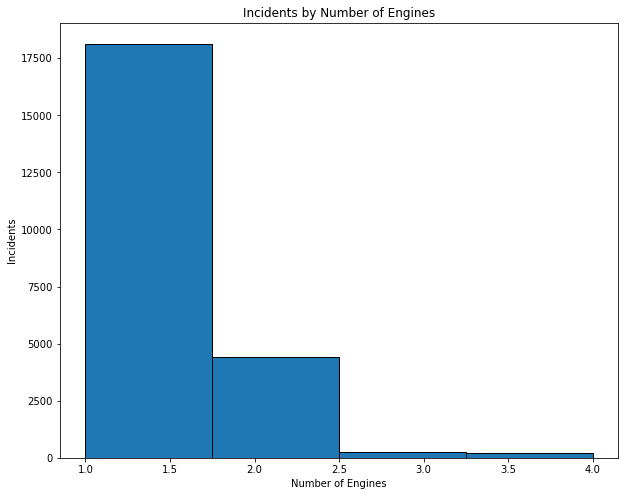

In [192]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(data['Number.of.Engines'], bins=4, edgecolor='black')
ax.set_xlabel("Number of Engines")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Number of Engines")
plt.show()

In [193]:
data['Engine.Type'].value_counts()

Reciprocating    18549
Turbo Prop        1822
Turbo Shaft       1517
Turbo Fan          782
Turbo Jet          307
Unknown             10
Electric             2
UNK                  1
Name: Engine.Type, dtype: int64

In [194]:
data.drop(data[data['Engine.Type'] == 'Unknown'].index, inplace=True)

In [195]:
data.drop(data[data['Engine.Type'] == 'Electric'].index, inplace=True)

In [196]:
data.drop(data[data['Engine.Type'] == 'UNK'].index, inplace=True)

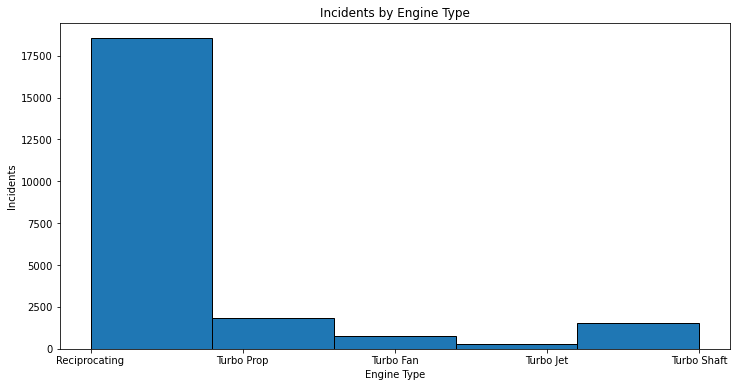

In [197]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(data['Engine.Type'], bins=5, edgecolor='black')
ax.set_xlabel("Engine Type")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Engine Type")
plt.show()

In [198]:
safest_aircraft = data[data['Number.of.Engines'] != 1.0]

In [199]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 8 to 89576
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              4847 non-null   object        
 1   Injury.Severity         4847 non-null   object        
 2   Aircraft.damage         4847 non-null   object        
 3   Make                    4847 non-null   object        
 4   Model                   4847 non-null   object        
 5   Number.of.Engines       4847 non-null   float64       
 6   Engine.Type             4847 non-null   object        
 7   Purpose.of.flight       4847 non-null   object        
 8   Total.Fatal.Injuries    4847 non-null   float64       
 9   Total.Serious.Injuries  4847 non-null   float64       
 10  Total.Minor.Injuries    4847 non-null   float64       
 11  Total.Uninjured         4847 non-null   float64       
 12  Weather.Condition       4847 non-null   object 

In [200]:
safest_aircraft['Make'].value_counts()

Cessna                            835
Beech                             816
Piper                             789
Boeing                            364
Mcdonnell Douglas                 157
                                 ... 
Bombardier, Inc.                    1
EMBRAER EXECUTIVE AIRCRAFT INC      1
HAWKER BEECHCRAFT CORPORATION       1
CANADAIR LTD                        1
CURTISS WRIGHT                      1
Name: Make, Length: 192, dtype: int64

In [201]:
safest_aircraft = safest_aircraft[safest_aircraft['Engine.Type'] != 'Reciprocating']

In [202]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 80 to 89576
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              2242 non-null   object        
 1   Injury.Severity         2242 non-null   object        
 2   Aircraft.damage         2242 non-null   object        
 3   Make                    2242 non-null   object        
 4   Model                   2242 non-null   object        
 5   Number.of.Engines       2242 non-null   float64       
 6   Engine.Type             2242 non-null   object        
 7   Purpose.of.flight       2242 non-null   object        
 8   Total.Fatal.Injuries    2242 non-null   float64       
 9   Total.Serious.Injuries  2242 non-null   float64       
 10  Total.Minor.Injuries    2242 non-null   float64       
 11  Total.Uninjured         2242 non-null   float64       
 12  Weather.Condition       2242 non-null   object

In [203]:
safest_aircraft['Make'].value_counts()

Boeing                  362
Beech                   276
Mcdonnell Douglas       156
Cessna                   97
Swearingen               93
                       ... 
Westland Helicopters      1
BOMBARDIER INC            1
Nord Aviation             1
de Havilland              1
IAI                       1
Name: Make, Length: 144, dtype: int64

In [204]:
safest_aircraft['Purpose.of.flight'].value_counts()

Unknown                      1309
Business                      262
Executive/corporate           203
Positioning                   196
Instructional                  78
Ferry                          58
Public Aircraft                52
Other Work Use                 32
Flight Test                    19
Skydiving                      13
Public Aircraft - Federal       8
Aerial Observation              4
Aerial Application              3
Firefighting                    2
Public Aircraft - Local         2
Air Race show                   1
Name: Purpose.of.flight, dtype: int64

In [205]:
safest_aircraft['Aircraft.damage'].value_counts()

Substantial    1040
Minor           704
Destroyed       498
Name: Aircraft.damage, dtype: int64

In [206]:
safest_aircraft.drop(safest_aircraft[safest_aircraft['Aircraft.damage'] == 'Substantial'].index, inplace=True)

In [208]:
safest_aircraft.drop(safest_aircraft[safest_aircraft['Aircraft.damage'] == 'Destroyed'].index, inplace=True)

In [209]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 80 to 89318
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              704 non-null    object        
 1   Injury.Severity         704 non-null    object        
 2   Aircraft.damage         704 non-null    object        
 3   Make                    704 non-null    object        
 4   Model                   704 non-null    object        
 5   Number.of.Engines       704 non-null    float64       
 6   Engine.Type             704 non-null    object        
 7   Purpose.of.flight       704 non-null    object        
 8   Total.Fatal.Injuries    704 non-null    float64       
 9   Total.Serious.Injuries  704 non-null    float64       
 10  Total.Minor.Injuries    704 non-null    float64       
 11  Total.Uninjured         704 non-null    float64       
 12  Weather.Condition       704 non-null    object 

In [213]:
safest_aircraft['Make'].value_counts()

Boeing                          247
Mcdonnell Douglas                96
Beech                            52
Douglas                          33
Swearingen                       21
                               ... 
Eclipse Aviation Corporation      1
BOEING                            1
Sabreliner Corp.                  1
BOMBARDIER                        1
PIAGGIO                           1
Name: Make, Length: 72, dtype: int64

In [228]:
top_5_makes = safest_aircraft['Make'].value_counts().nlargest(5).index

In [229]:
safest_aircraft = safest_aircraft[safest_aircraft['Make'].isin(top_5_makes)]
print (safest_aircraft)

       Event.Date Injury.Severity Aircraft.damage               Make  \
320    1982-02-15        Incident           Minor             Boeing   
419    1982-02-26        Incident           Minor              Beech   
515    1982-03-09        Incident           Minor         Swearingen   
719    1982-03-30        Incident           Minor         Swearingen   
796    1982-04-09        Incident           Minor             Boeing   
...           ...             ...             ...                ...   
49564  2000-10-17        Incident           Minor             Boeing   
49606  2000-10-23       Non-Fatal           Minor             Boeing   
49764  2000-11-29        Incident           Minor  Mcdonnell Douglas   
49814  2000-12-12        Incident           Minor             Boeing   
85118  2019-10-31       Non-Fatal           Minor              Beech   

          Model  Number.of.Engines Engine.Type Purpose.of.flight  \
320    B737-2H4                2.0   Turbo Jet           Unknown   

In [230]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 320 to 85118
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              449 non-null    object        
 1   Injury.Severity         449 non-null    object        
 2   Aircraft.damage         449 non-null    object        
 3   Make                    449 non-null    object        
 4   Model                   449 non-null    object        
 5   Number.of.Engines       449 non-null    float64       
 6   Engine.Type             449 non-null    object        
 7   Purpose.of.flight       449 non-null    object        
 8   Total.Fatal.Injuries    449 non-null    float64       
 9   Total.Serious.Injuries  449 non-null    float64       
 10  Total.Minor.Injuries    449 non-null    float64       
 11  Total.Uninjured         449 non-null    float64       
 12  Weather.Condition       449 non-null    object

In [231]:
safest_aircraft.head()

,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
320,1982-02-15,Incident,Minor,Boeing,B737-2H4,2.0,Turbo Jet,Unknown,0.0,0.0,0.0,119.0,IMC,1982-02-15
419,1982-02-26,Incident,Minor,Beech,B90,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,3.0,IMC,1982-02-26
515,1982-03-09,Incident,Minor,Swearingen,SA-266TC,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,9.0,UNK,1982-03-09
719,1982-03-30,Incident,Minor,Swearingen,SA226TC,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,18.0,VMC,1982-03-30
796,1982-04-09,Incident,Minor,Boeing,727-200,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,108.0,IMC,1982-04-09


In [233]:
from datetime import datetime
cut_off_date = datetime(2000, 1, 1)

In [236]:
safest_aircraft = safest_aircraft[safest_aircraft['Event.Date'] >= cut_off_date]

TypeError: '>=' not supported between instances of 'str' and 'datetime.datetime'

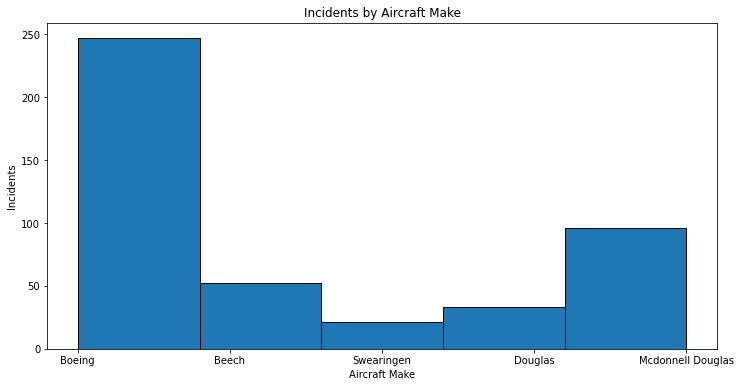

In [232]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(safest_aircraft['Make'], bins=5, edgecolor='black')
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Aircraft Make")
plt.show()

# Conclusions

1) Aircraft with multiple engines are more reliable.  Overwhelmingly, aircraft involved in incidents are single engine aircraft.
2) Turbo fan engines appear most reliable, though avoiding reciprocating engines seems most crucial when it comes to engine type.
3)

## Limitations

The dataset outlines incidents only and does not include information on the total number of aircraft or total flights, leaving room for more precision using a more complete dataset.

## Recommendations

## Next Steps

Evaluating cost and other variables will be crucial, such as ease of service and repair, as well as ability to modify for business purposes, since these considerations will factor into choosing aircraft to purchase.